In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc 
 

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
sns.set(font_scale=1.15)
sns.set_style("whitegrid")

In [3]:
# Create Connection String
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=(local);'
                      'UID=sa;'
                      'PWD=Adm1234;'
                      'Database=BAAC_MB;'
                      'Trusted_Connection=no;')

In [4]:
pd.set_option('float_format', '{:f}'.format)

In [5]:
_strsql = "select * from tmp_MB_TXN_DAYHOUR3 "
df = pd.read_sql(_strsql, conn)

print(df.shape)
df.head()

(11351447, 4)


,Age,DD,HH,TRANSACTIONAMOUNT
0,29,4,14,14660.000000
1,44,4,14,224.000000
2,28,4,14,500.000000
3,39,4,14,347.000000
4,39,4,14,100.000000


In [6]:
df[:1000]

,Age,DD,HH,TRANSACTIONAMOUNT
0,29,4,14,14660.000000
1,44,4,14,224.000000
2,28,4,14,500.000000
3,39,4,14,347.000000
4,39,4,14,100.000000
...,...,...,...,...
995,43,4,11,700.000000
996,34,4,10,80.000000
997,55,4,10,1600.000000
998,48,4,11,688.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


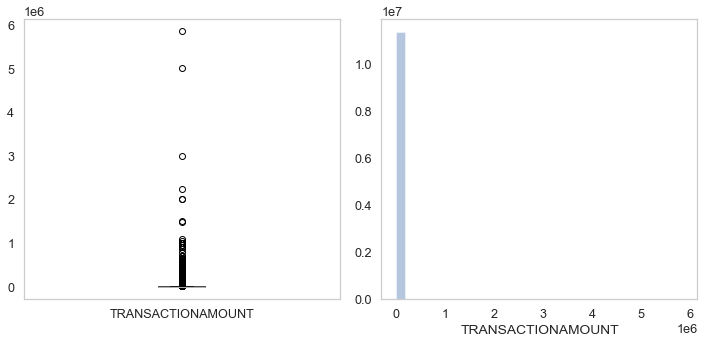

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10,5))

df.boxplot(column=['TRANSACTIONAMOUNT'], ax=ax1)
sns.distplot(df['TRANSACTIONAMOUNT'], kde=False, bins=30, ax=ax2)

plt.tight_layout()
ax1.grid(False)
ax2.grid(False)
plt.grid(False)
plt.show();

In [8]:
df_bin =  df[['Age', 'TRANSACTIONAMOUNT']] 
df_bin['bin_Age'] = pd.qcut(df["Age"].astype(float), q=4, duplicates='drop', precision=0)

df_bin = df_bin.groupby('bin_Age').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_bin.columns = df_bin.columns.map('_'.join)
df_bin = df_bin.reset_index()
df_bin.head()

<ipython-input-8-1578d28f47bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin['bin_Age'] = pd.qcut(df["Age"].astype(float), q=4, duplicates='drop', precision=0)


,bin_Age,TRANSACTIONAMOUNT_count,TRANSACTIONAMOUNT_sum,TRANSACTIONAMOUNT_mean
0,"(14.0, 29.0]",2949120,4066858023.470160,1379.007305
1,"(29.0, 37.0]",2987312,7670951064.470511,2567.843956
2,"(37.0, 45.0]",2586728,8506394516.130651,3288.476607
3,"(45.0, 164.0]",2828287,13997649158.350718,4949.161510


In [10]:
df_bin =  df[['DD', 'TRANSACTIONAMOUNT']] 
df_bin['bin_DD'] = pd.qcut(df["DD"].astype(float), q=5, duplicates='drop', precision=0)

df_bin = df_bin.groupby('bin_DD').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_bin.columns = df_bin.columns.map('_'.join)
df_bin = df_bin.reset_index()
df_bin.head()

<ipython-input-10-23254382b9a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin['bin_DD'] = pd.qcut(df["DD"].astype(float), q=5, duplicates='drop', precision=0)


,bin_DD,TRANSACTIONAMOUNT_count,TRANSACTIONAMOUNT_sum,TRANSACTIONAMOUNT_mean
0,"(0.0, 8.0]",2523982,7272551218.550702,2881.379985
1,"(8.0, 14.0]",2142583,5429376643.150267,2534.033287
2,"(14.0, 19.0]",2305841,6533794483.180734,2833.584138
3,"(19.0, 24.0]",2113402,6405101716.870330,3030.706755
4,"(24.0, 29.0]",2265639,8601028700.670626,3796.292658


In [123]:


df_young =  df[['HH', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=0) & (df["Age"]<=23)]
df_young = df_young.groupby('HH').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_young.columns = df_young.columns.map('_'.join)
df_young = df_young.reset_index()
 

df_work =  df[['HH', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=24) & (df["Age"]<=39)]
df_work = df_work.groupby('HH').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_work.columns = df_work.columns.map('_'.join)
df_work = df_work.reset_index()

df_family =  df[['HH', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=40) & (df["Age"]<=55)]
df_family = df_family.groupby('HH').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_family.columns = df_family.columns.map('_'.join)
df_family = df_family.reset_index()

df_old =  df[['HH', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=55) & (df["Age"]<=200)]
df_old = df_old.groupby('HH').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_old.columns = df_old.columns.map('_'.join)
df_old = df_old.reset_index()
 
 

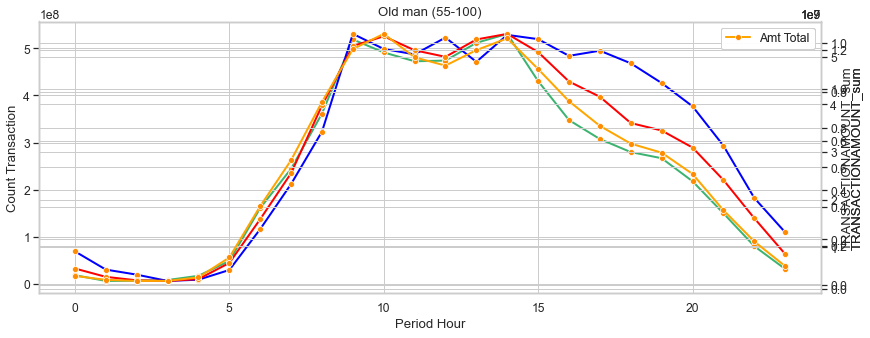

In [124]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,5))

sns.lineplot(data=df_old, x=df_old.index, y=df_old['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='mediumseagreen', 
                  linewidth=2, label='Amt Total',ax=ax)
ax2 = ax.twinx()

sns.lineplot(data=df_young, x=df_young.index, y=df_young['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='blue', 
                  linewidth=2, label='Amt Total',ax=ax2)

ax3 = ax.twinx()                  

sns.lineplot(data=df_work, x=df_work.index, y=df_work['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='red', 
                  linewidth=2, label='Amt Total',ax=ax3)                
ax4 = ax.twinx()                  

sns.lineplot(data=df_family, x=df_family.index, y=df_family['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='orange', 
                  linewidth=2, label='Amt Total',ax=ax4)                      

plt.xlabel('xlabel', fontsize=24)
  
#ax.grid(true)
#plt.rc('font', family='Tahoma')
ax.set(xlabel='Period Hour', ylabel='Count Transaction')
 
 
ax.set_title("Old man (55-100)")
plt.show();

In [125]:


df_young =  df[['DD', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=0) & (df["Age"]<=23)]
df_young = df_young.groupby('DD').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_young.columns = df_young.columns.map('_'.join)
df_young = df_young.reset_index()
 

df_work =  df[['DD', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=24) & (df["Age"]<=39)]
df_work = df_work.groupby('DD').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_work.columns = df_work.columns.map('_'.join)
df_work = df_work.reset_index()

df_family =  df[['DD', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=40) & (df["Age"]<=55)]
df_family = df_family.groupby('DD').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_family.columns = df_family.columns.map('_'.join)
df_family = df_family.reset_index()

df_old =  df[['DD', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=55) & (df["Age"]<=200)]
df_old = df_old.groupby('DD').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_old.columns = df_old.columns.map('_'.join)
df_old = df_old.reset_index()

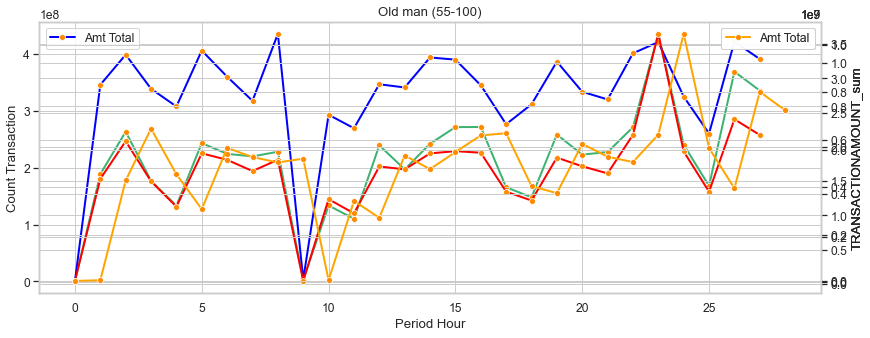

In [126]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,5))

sns.lineplot(data=df_old, x=df_old.index, y=df_old['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='mediumseagreen', 
                  linewidth=2, label='Amt Total',ax=ax)
ax2 = ax.twinx()

sns.lineplot(data=df_young, x=df_young.index, y=df_young['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='blue', 
                  linewidth=2, label='Amt Total',ax=ax2)

ax3 = ax.twinx()                  

sns.lineplot(data=df_work, x=df_work.index, y=df_work['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='red', 
                  linewidth=2, label='Amt Total',ax=ax3)                
ax4 = ax.twinx()                  

sns.lineplot(data=df_family, x=df_family.index, y=df_family['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=6, color='orange', 
                  linewidth=2, label='Amt Total',ax=ax4)                      

plt.xlabel('xlabel', fontsize=24)
  
#ax.grid(true)
#plt.rc('font', family='Tahoma')
ax.set(xlabel='Period Hour', ylabel='Count Transaction')
 
 
ax.set_title("Old man (55-100)")
plt.show();

## สูงอายุ

In [88]:
#ranges = [0,8, 11,15,17, np.inf]  

df_bin =  df[['HH', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=55) & (df["Age"]<=100)]
df_bin['bin_hh'] = pd.qcut(df_bin["HH"].astype(float), q=5, )
#df_bin['bin_hh'] = pd.cut(df["HH"].astype(float),bins=ranges, duplicates='drop', precision=0 )


df_bin = df_bin.groupby('bin_hh').agg({'TRANSACTIONAMOUNT': ['count', 'sum','mean']})
df_bin.columns = df_bin.columns.map('_'.join)
df_bin = df_bin.reset_index()
df_bin.head()

,bin_hh,TRANSACTIONAMOUNT_count,TRANSACTIONAMOUNT_sum,TRANSACTIONAMOUNT_mean
0,"(-0.001, 9.0]",206028,1257499755.919986,6103.538140
1,"(9.0, 12.0]",171928,1302099746.789989,7573.517675
2,"(12.0, 15.0]",165722,1313406794.709994,7925.361718
3,"(15.0, 18.0]",167262,828927944.739988,4955.865318
4,"(18.0, 23.0]",146070,660569798.779997,4522.282459


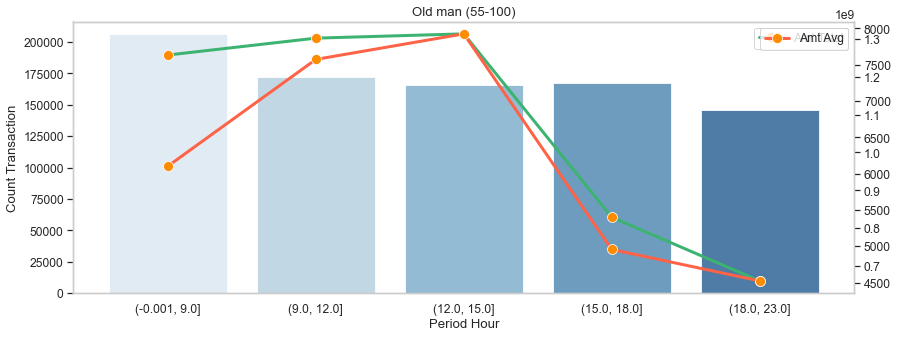

In [91]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,5))
### y axis (left) is bar plot ###
#sns.barplot(df_bin['bin_hh'], df_bin['HH_sum'], data = df_bin, color='navajowhite', alpha=.6, ax = ax[1])

sns.barplot(x = 'bin_hh', y = 'TRANSACTIONAMOUNT_count',data = df_bin,
            palette = 'Blues', alpha=.8 ,ax=ax
 )
ax2 = ax.twinx()

sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=10, color='mediumseagreen', 
                  linewidth=3, label='Amt Total',ax=ax2)

ax3 = ax.twinx()                  

sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['TRANSACTIONAMOUNT_mean']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=10
                  , color='tomato', 
                  linewidth=3, label='Amt Avg',ax=ax3)                  

plt.xlabel('xlabel', fontsize=24)
ax3.grid(False)
ax2.grid(False)
ax.grid(False)
#plt.rc('font', family='Tahoma')
ax.set(xlabel='Period Hour', ylabel='Count Transaction')
ax2.set( ylabel='')
ax3.set( ylabel='')
ax.set_title("Old man (55-100)")
plt.show();

## วัยทำงาน

In [93]:
df_bin =  df[['HH', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=25) & (df["Age"]<=35)]
df_bin['bin_hh'] = pd.qcut(df_bin["HH"].astype(float), q=5, duplicates='drop', precision=0)


df_bin = df_bin.groupby('bin_hh').agg({'TRANSACTIONAMOUNT': ['count', 'sum','median']})
df_bin.columns = df_bin.columns.map('_'.join)
df_bin = df_bin.reset_index()
df_bin.head()

,bin_hh,TRANSACTIONAMOUNT_count,TRANSACTIONAMOUNT_sum,TRANSACTIONAMOUNT_median
0,"(-1.0, 9.0]",937907,1796420857.849990,200.000000
1,"(9.0, 12.0]",662822,1879269459.810000,300.000000
2,"(12.0, 16.0]",911085,2418151099.440007,290.000000
3,"(16.0, 19.0]",738037,1354232756.939983,200.000000
4,"(19.0, 23.0]",652355,962621589.899978,179.000000


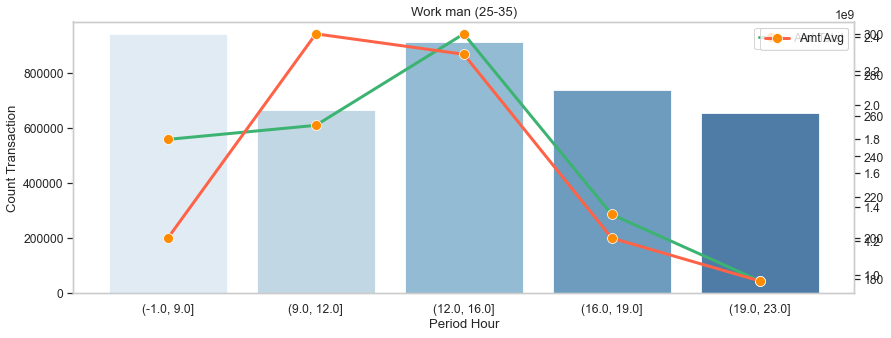

In [94]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,5))
### y axis (left) is bar plot ###
#sns.barplot(df_bin['bin_hh'], df_bin['HH_sum'], data = df_bin, color='navajowhite', alpha=.6, ax = ax[1])

sns.barplot(x = 'bin_hh', y = 'TRANSACTIONAMOUNT_count',data = df_bin,
            palette = 'Blues', alpha=.8 ,ax=ax
 )
ax2 = ax.twinx()

sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=10, color='mediumseagreen', 
                  linewidth=3, label='Amt Total',ax=ax2)

ax3 = ax.twinx()                  

sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['TRANSACTIONAMOUNT_median']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=10
                  , color='tomato', 
                  linewidth=3, label='Amt Avg',ax=ax3)                  

plt.xlabel('xlabel', fontsize=24)
ax3.grid(False)
ax2.grid(False)
ax.grid(False)
#plt.rc('font', family='Tahoma')
ax.set(xlabel='Period Hour', ylabel='Count Transaction')
ax2.set( ylabel='')
ax3.set( ylabel='')
ax.set_title("Work man (25-35)")
plt.show();

## วัยกลางคน

In [95]:
df_bin =  df[['HH', 'TRANSACTIONAMOUNT']][(df["TRANSACTIONAMOUNT"]>0)][(df["Age"]>=36) & (df["Age"]<=55)]
df_bin['bin_hh'] = pd.qcut(df_bin["HH"].astype(float), q=5, duplicates='drop', precision=0)


df_bin = df_bin.groupby('bin_hh').agg({'TRANSACTIONAMOUNT': ['count', 'sum','median']})
df_bin.columns = df_bin.columns.map('_'.join)
df_bin = df_bin.reset_index()
df_bin.head()

,bin_hh,TRANSACTIONAMOUNT_count,TRANSACTIONAMOUNT_sum,TRANSACTIONAMOUNT_median
0,"(-1.0, 9.0]",1272516,4423315266.250012,300.000000
1,"(9.0, 12.0]",987742,4552358337.719995,476.000000
2,"(12.0, 15.0]",970586,4614104340.230015,480.960000
3,"(15.0, 18.0]",1023027,3234995392.750000,380.000000
4,"(18.0, 23.0]",1029755,2588788458.620003,249.000000


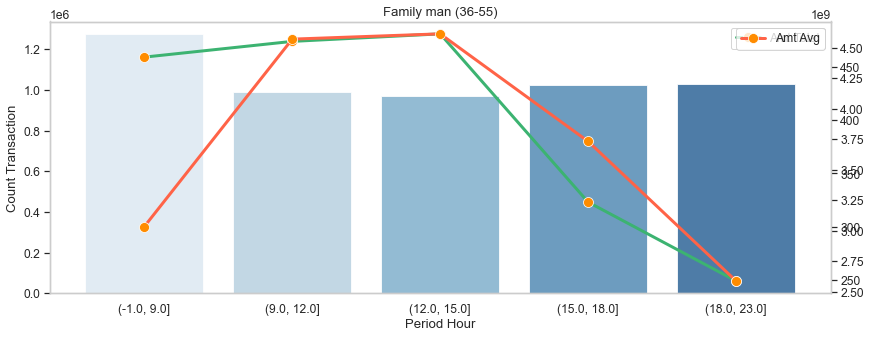

In [96]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,5))
### y axis (left) is bar plot ###
#sns.barplot(df_bin['bin_hh'], df_bin['HH_sum'], data = df_bin, color='navajowhite', alpha=.6, ax = ax[1])

sns.barplot(x = 'bin_hh', y = 'TRANSACTIONAMOUNT_count',data = df_bin,
            palette = 'Blues', alpha=.8 ,ax=ax
 )
ax2 = ax.twinx()

sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=10, color='mediumseagreen', 
                  linewidth=3, label='Amt Total',ax=ax2)

ax3 = ax.twinx()                  

sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['TRANSACTIONAMOUNT_median']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=10
                  , color='tomato', 
                  linewidth=3, label='Amt Avg',ax=ax3)                  

plt.xlabel('xlabel', fontsize=24)
ax3.grid(False)
ax2.grid(False)
ax.grid(False)
#plt.rc('font', family='Tahoma')
ax.set(xlabel='Period Hour', ylabel='Count Transaction')
ax2.set( ylabel='')
ax3.set( ylabel='')
ax.set_title("Family man (36-55)")
plt.show();

## วัยรุ่น

In [99]:
df_bin =  df[['HH', 'TRANSACTIONAMOUNT']][(df["Age"]>=0) & (df["Age"]<=24)]
df_bin['bin_hh'] = pd.qcut(df_bin["HH"].astype(float), q=5, duplicates='drop', precision=0)


df_bin = df_bin.groupby('bin_hh').agg({'TRANSACTIONAMOUNT': ['count', 'sum','median']})
df_bin.columns = df_bin.columns.map('_'.join)
df_bin = df_bin.reset_index()
df_bin.head()

,bin_hh,TRANSACTIONAMOUNT_count,TRANSACTIONAMOUNT_sum,TRANSACTIONAMOUNT_median
0,"(-1.0, 9.0]",299488,224795853.210001,100.000000
1,"(9.0, 13.0]",270805,306820393.570000,148.000000
2,"(13.0, 16.0]",209969,231130098.940002,150.000000
3,"(16.0, 19.0]",256278,201113694.390001,120.000000
4,"(19.0, 23.0]",253995,144030850.160000,100.000000


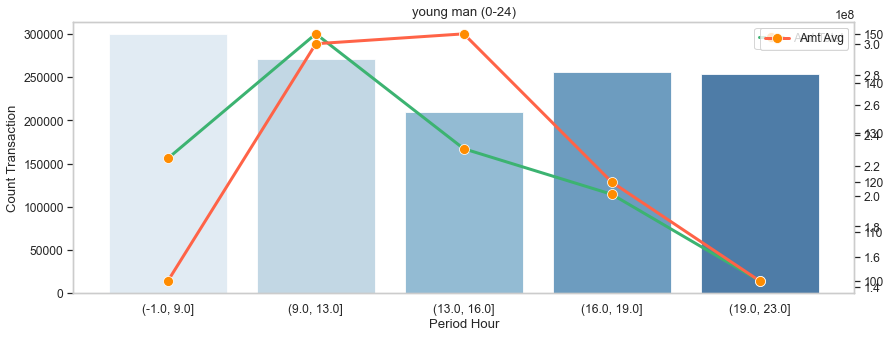

In [100]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,5))
### y axis (left) is bar plot ###
#sns.barplot(df_bin['bin_hh'], df_bin['HH_sum'], data = df_bin, color='navajowhite', alpha=.6, ax = ax[1])

sns.barplot(x = 'bin_hh', y = 'TRANSACTIONAMOUNT_count',data = df_bin,
            palette = 'Blues', alpha=.8 ,ax=ax
 )
ax2 = ax.twinx()

sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['TRANSACTIONAMOUNT_sum']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=10, color='mediumseagreen', 
                  linewidth=3, label='Amt Total',ax=ax2)

ax3 = ax.twinx()                  

sns.lineplot(data=df_bin, x=df_bin.index, y=df_bin['TRANSACTIONAMOUNT_median']\
                   , marker='o',\
                  markerfacecolor='darkorange', markersize=10
                  , color='tomato', 
                  linewidth=3, label='Amt Avg',ax=ax3)                  

plt.xlabel('xlabel', fontsize=24)
ax3.grid(False)
ax2.grid(False)
ax.grid(False)
#plt.rc('font', family='Tahoma')
ax.set(xlabel='Period Hour', ylabel='Count Transaction')
ax2.set( ylabel='')
ax3.set( ylabel='')
ax.set_title("young man (0-24)")
plt.show();